In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib
%matplotlib inline

Using matplotlib backend: <object object at 0x7f03097ef170>


## finding interest rate of periodic payment plan
- $p$ : present value
- $n$ : number of periods
- $r$ : interest per period
- $d=\frac{1}{1+r}$ : discount  multiplier
- $m$ : periodic payment

we have: 
$\frac{m}{P} = \frac{r}{1 - \frac{1}{(1+r)^n}}$

and 
$\frac{P}{m} =\dfrac{d(1-d^n)}{1-d} =\dfrac{1-d^n}{r}$

let $P/m=a$  

the equation equivalent to:

$d^n+d^{n-1}+...+d = \frac{P}{m}$

let: $a=\frac{P}{m}$
 $f(d) = \dfrac{d^n+d^{n-1}+...+d}{a}  -1$
 
Note that $d$ is discount factor which has inverse relation with interest rate $r$ through $d=\frac{1}{1+r}$
and $d^{\prime} = -\frac{1}{(1+r)^2}$

also note that $f(1)=\dfrac{nm}{p}-1$ (note that this, i.e $d=1$ happens at $r=0$)

if $f(1) >0$, everything seems as it should: since our total nominal payment $nm$ must be greater than $P$
and if $f(1)<0$ we have problem of having negative interest rate.

## What is $f(d)$ conceptually? how can we relate it to any value or monetary concept?
Let consider profit of investor, as present value of investor cashflow, call it PVPI
$PVPI = \sum_{i=1}^n m*d^i - P = P*[\dfrac{\sum_{i=1}^n d^i}{\frac{P}{m}}-1] = P*[\dfrac{\sum_{i=1}^n d^i}{a}-1] = P*f(d)$
So $f(d)$ is exactly equivalent to investor profit per unit of investment. 
This make it even more great to work with P=1. (WLOG, because of linearity w.r.t P) 

For fix $P, m, n$ Note that $f(d)$ is increasing function of $d$ and decreasing function of $r$ 

Now we can say if $f(1)<0$ , means that best case scenario for investor ($r=0$) is still losing
 money so actually no investor would accept such a payment plan.
 

## finding the root
we should solve $f(d)=0$. write this as follows:
$a*f(d)=0$ or
$\sum_{i=1}^n d^i -a =0$

Also note that $PVIP = P*f(d) = \frac{P}{a} * (a * f(d)) = m * (a * f(d))$

So $PVIP = m * (\sum_{i=1}^n d^i -a)$ 
 or
 $\sum_{i=1}^n d^i -a = \frac{1}{m}* PVIP$ 
 
this means that RHS of equation $\sum_{i=1}^n d^i -a =0$ is investor profit is divided by $m$.
From this we can decide how much error is tolerated and how exact we need to find $d$ , solution of this equation

so for each given $P$ and $m$ and $n$ we need to find $d$ such that  $\sum_{i=1}^n d^i = a = \frac{P}{m}$.
Let $g(d)=\sum_{i=1}^n d^i$  Note that $g$ is increasing in $d$. 
So if we start from $d=1$ and decrease $d$ toward zero, $g(d)$ decrease from $n$ toward 0.
But values of $d$ closer to $d=1$ are more important, more common and more natural! 

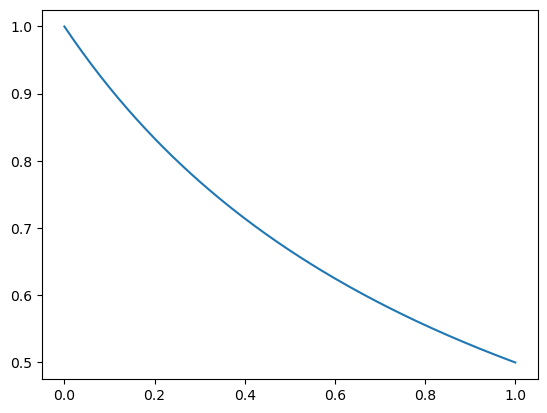

In [3]:
# Lets draw some values of d vs corresponding r

rps = np.linspace(0, 100, 201)
rs = rps/100
ds = 1/(1+rs)
plt.plot(rs, ds)

So even for $r=1$, i.e `100%` interest rate $d$ is higher than $0.5$
So we could pre compute values of $g(d)$ for different $d$s for each given $n$


Focus on $g(d) = \dfrac{d-d^{n+1}}{1-d}$. To be able to compute $g(d)$s for different $d$s and $n$s
we only need to compute $d^n$ for different $d$s and $n$s
Also note that powers of numbers might be useful for many other computations.
So we would like to have pre computed $d^n$ for some different(typical!?) values 
of $d$ and $n$ 


In case of are computation here, for each $n$ same computation is done for all 
different values of $d$. This most likely will be the case for many other situations
as well.
So let us create a vector $ds$ of different(usual) values of $d$
Then compute $ds^n$ for different values (usual) of $n$. 
Let say we have $n_n$ different values for $n$ and $n_d$ be the number of different
 values for $d$.
 We create a `n_n * n_d` numpy array by stacking $n_n$ copies of $ds$ on top of each other
 Call this numpy array $D$. From $D$ we can get powers of $ds$ by `np.cumprod`
 

In [4]:
# Estimating size of data
n_n=360
n_d= 100 * 100
bu = 8
total_bytes = n_n * n_d * bu
total_bytes_MG = total_bytes/10**6
total_bytes_MG

28.8

In [5]:
# create vector of n's, called ns and vector of d's called ds
ns_old = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 
      15, 18, 21, 24, 
      30, 36,
      48, 60, 72, 84, 96, 108, 120]

ns = np.arange(1, n_n+1)
PIP = 10**(-4)
dis = list(range(10**4))
ds = PIP*np.array(dis)
ds = ds[np.newaxis,:]
ds.shape

(1, 10000)

In [6]:
D=np.concatenate([ds for i in range(len(ns))], axis=0)
D.shape

(360, 10000)

In [7]:
D_powers = np.cumprod(D, axis=0)

In [8]:
# first way of computing g(d), through g(d) = d+d^2+...+d^n
D_powers_cumsums = np.cumsum(D_powers, axis=0)

In [9]:
# another way of computing g(d), through g(d) = (d-d^{n+1}) / (1-d)
A = (D - D_powers*ds)/(1-ds)

In [10]:
# computing absolute error between two ways of computing
gd_abs_error = D_powers_cumsums - A

In [11]:
np.max(gd_abs_error)

3.893774191965349e-12

In [12]:
D_powers.nbytes/10**6

28.8

In [13]:
DPS = D_powers_cumsums
DPS.shape

(360, 10000)

In [23]:
# additive delta from given column to next column, given value of d, to next value of d
delta_DPS = DPS[:, 1:] - DPS[:, :-1]

In [15]:
# multiplicative delta from given column to next column, given value of d, to next value of d
geo_delta_DPS = delta_DPS / DPS[:, 1:]

In [64]:
def my_range(*, arr=None, lower_row=None, upper_row=None, 
             lower_col=None, upper_col=None, 
             return_args=False):
      arr_r = arr[lower_row:upper_row, lower_col:upper_col]
      extremes = (np.min(arr_r) , np.max(arr_r))
      if return_args:
          # here I will add computation of argmin and argmax 
          arg_min_flat = np.argmin(arr_r)
          arg_min_r = (arg_min_flat // arr_r.shape[1], arg_min_flat % arr_r.shape[1]) #
          arg_min = (arg_min_r[0]+lower_row, arg_min_r[1]+lower_col)
          
          arg_max_flat = np.argmax(arr_r)
          arg_max_r = (arg_max_flat // arr_r.shape[1], arg_max_flat % arr_r.shape[1])
          arg_max = (arg_max_r[0]+lower_row, arg_max_r[1]+lower_col)
          dic_r = {'min':extremes[0], 'max':extremes[1],
                   'argmin': arg_min, 'argmax': arg_max}
          return dic_r
      else:
          return extremes

(120, 9899)

In [69]:
# what is max delta, on a sub array, since for first ...
cols_lower = 100
cols_upper = n_d

row_lower = 0
row_upper = 120

ddd = my_range(arr=delta_DPS, lower_row=row_lower, upper_row=row_upper, 
         lower_col=cols_lower, upper_col=cols_upper,
              return_args=True
         )

In [68]:
# what is max geo_delta, on a sub array, since for first ...
cols_lower_geo = 100
cols_upper_geo = n_d

row_lower_geo = 0
row_upper_geo = 120

my_range(arr=geo_delta_DPS, lower_row=row_lower_geo,  upper_row=row_upper_geo, 
         lower_col=cols_lower_geo, upper_col=cols_upper_geo   
         )

(0.000100010001000089, 0.010001000100009988)